In [1]:
#investigating the shapes and sizes of different subhalos
import astropy.units as u
import numpy as np
import gala.potential as gp
import gala.dynamics as gd
from gala.dynamics import mockstream as ms
from gala.units import galactic
from astropy.coordinates import SkyCoord, Distance
#import popsims
import matplotlib.pyplot as plt
#%matplotlib notebook
from tqdm import tqdm
from astropy.constants import G
import HSS
from gala.units import galactic
import gala.coordinates as gc
import  h5py
import imageio
import seaborn as sns
import matplotlib as mpl
import matplotlib.animation as animation
import astropy.coordinates as astro_coord
sns.set_style("dark")
mpl.rc('xtick', labelsize=16) 
mpl.rc('ytick', labelsize=16) 
font = {'axes.titlesize'      : 'large',   # fontsize of the axes title
        'axes.labelsize'      : 'large', # fontsize of the x any y labels
        'size'   : 16}
#plt.style.use('dark_background')
import itertools
#paths
path_plot = '/users/caganze/research/stellarstreams/figures/stream/'
path_data = '/users/caganze/research/stellarstreams/data/stream/'


In [4]:

#coords standards
_ = astro_coord.galactocentric_frame_defaults.set('v4.0')

#potential and hamiltonian
pot=gp.MilkyWayPotential()
H = gp.Hamiltonian(pot)
#galactocentric reference frame
v_sun = astro_coord.CartesianDifferential([11.1, 220 + 24.0, 7.25]*u.km/u.s)

galcen_frame =astro_coord.Galactocentric(galcen_distance=8.*u.kpc,
                                    galcen_v_sun=v_sun)

In [5]:
#position for a random stream (forget about pal 5)
coord=SkyCoord(x=10.*u.kpc, y=0 * u.kpc,z=10*u.kpc,\
         v_x=0*u.km/u.s, v_y=170*u.km/u.s, v_z=0*u.km/u.s, frame=galcen_frame)


st_pos=gd.PhaseSpacePosition(coord.transform_to(galcen_frame).cartesian)

In [28]:
point_potential=gp.HernquistPotential(10**6*u.Msun,  106*u.pc, units=galactic)
point_potential2=gp.HernquistPotential(10**6*u.Msun,  1.06*u.kpc, units=galactic)
point_potential3=gp.HernquistPotential(10**6*u.Msun,  1.06*u.pc, units=galactic)






    

Text(0, 0.5, '$\\Phi(x,0,1)$ [$\\mathrm{\\frac{kpc^{2}}{Myr^{2}}}$]')

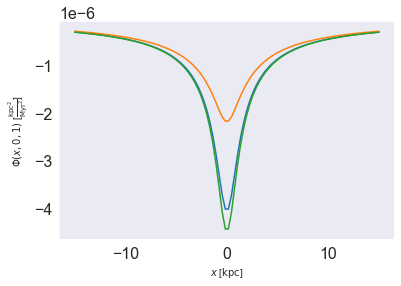

In [30]:
fig, ax = plt.subplots() 
point_potential.plot_contours(grid=(np.linspace(-15,15,100), 0., 1.), marker='', ax=ax) 
point_potential2.plot_contours(grid=(np.linspace(-15,15,100), 0., 1.), marker='', ax=ax) 
point_potential3.plot_contours(grid=(np.linspace(-15,15,100), 0., 1.), marker='', ax=ax) 




E_unit = point_potential.units['energy'] / point_potential.units['mass']
ax.set_xlabel("$x$ [{}]".format(point_potential.units['length'].to_string(format='latex'))) 
ax.set_ylabel("$\Phi(x,0,1)$ [{}]".format(E_unit.to_string(format='latex'))) 



In [ ]:
s=pd.r